# looking for market portfolio and beta

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# input the date of data beginning

datebegin = input("Tell me the first date of data (xxxx-x-x): ")
dateend = pd.datetime.now()

In [3]:
#first we create a nan set for future data input

dateindex = pd.date_range(datebegin, dateend).astype('str')
nansheet = pd.DataFrame(index=dateindex)
nansheet.head()

""
2015-01-01
2015-01-02
2015-01-03
2015-01-04
2015-01-05


In [4]:
# stock list should be input first
stocklist = ["AAL", "AAP"]

In [5]:
for i in range(len(stocklist)):
    i_data = pd.read_csv(stocklist[i] + ".csv").set_index("Date")
    df = i_data["Adj Close"]
    df.index.name = None
    nansheet[stocklist[i]] = df
    
nansheet.head()

,AAL,AAP
2015-01-01,NaN,NaN
2015-01-02,51.079918,156.250885
2015-01-03,NaN,NaN
2015-01-04,NaN,NaN
2015-01-05,51.051483,154.191315


In [6]:
# 计算各只股票的日收益率
fullsheet = nansheet.copy().dropna(axis=0)
returnsheet = fullsheet.pct_change()
returnsheet.head()

,AAL,AAP
2015-01-02,NaN,NaN
2015-01-05,-0.000557,-0.013181
2015-01-06,-0.015590,-0.000703
2015-01-07,-0.000566,0.021489
2015-01-08,0.012262,0.008765


In [7]:
# calculate daily mean return and volatility
meanreturn = returnsheet.describe().loc['mean']
vol = returnsheet.describe().loc['std']

In [8]:
# calculate covariance
cov = returnsheet.cov()

In [9]:
# draw efficient frontier
portfolio = pd.DataFrame(index=np.arange(0, 0.02, 0.0001),
                         columns=["min vol"])

for ret in np.arange(0, 0.02, 0.0001):
    fun = lambda x : np.sqrt(np.dot(x, np.dot(cov, x.T))) 
    cons = ({'type': 'eq', 'fun': lambda x: np.dot(x, meanreturn) - ret},
            {'type': 'eq', 'fun': lambda x: sum(x) - 1})
    x0 = np.zeros(len(stocklist))
    x0[0] = 1
    res = minimize(fun, x0, method='SLSQP', constraints=cons)
    portfolio.loc[ret]['min vol'] = res.fun
    
portfolio

,min vol
0.0000,0.0211457
0.0001,0.0205114
0.0002,0.0214119
0.0003,0.0236728
0.0004,0.0269539
0.0005,0.0309322
0.0006,0.0353733
0.0007,0.0401237
0.0008,0.0450859
0.0009,0.050197


(0, 0.004)

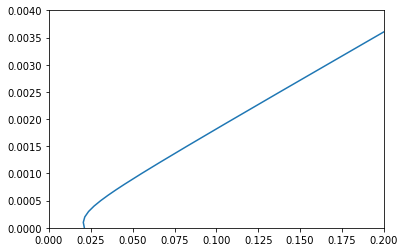

In [10]:
plt.plot(portfolio["min vol"], portfolio.index)
plt.xlim(0, 0.2)
plt.ylim(0, 0.004)

In [11]:
portfolio["sharpe ratio"] = portfolio.index / portfolio['min vol']
max_sharpe = max(portfolio['sharpe ratio'])

In [12]:
max_sharpe
portfolio[portfolio["sharpe ratio"]==max_sharpe]

,min vol,sharpe ratio
0.0015,0.0823984,0.0182042


In [13]:
fun = lambda x : np.sqrt(np.dot(x, np.dot(cov, x.T))) 
cons = ({'type': 'eq', 'fun': lambda x: np.dot(x, meanreturn) - 0.0015},
            {'type': 'eq', 'fun': lambda x: sum(x) - 1})
x0 = np.zeros(len(stocklist))
x0[0] = 1
res = minimize(fun, x0, method='SLSQP', constraints=cons)
weight = res.x

weight


array([-2.06541982,  3.06541982])

In [26]:
# calculate beta & alpha
market_sheet = returnsheet.copy()
m, n = market_sheet.shape
market_sheet['market portfolio'] = np.nan

marketreturn = pd.read_csv("market_portfolio_data.csv")
marketreturn.index = marketreturn["Date"]
market_sheet["market portfolio"] = marketreturn["market portfolio"]
market_sheet


,AAL,AAP,market portfolio
2015-01-02,NaN,NaN,NaN
2015-01-05,-0.000557,-0.013181,-0.023433
2015-01-06,-0.015590,-0.000703,0.027212
2015-01-07,-0.000566,0.021489,0.005601
2015-01-08,0.012262,0.008765,0.058380
2015-01-09,-0.030563,-0.005089,-0.055356
2015-01-12,-0.046905,-0.008546,-0.001530
2015-01-13,0.016539,-0.032530,0.031871
2015-01-14,-0.019643,-0.019056,-0.019208
2015-01-15,0.000000,-0.018630,-0.031071


In [27]:
betamat = market_sheet.cov()/(market_sheet["market portfolio"].var())
beta = betamat.loc["market portfolio"]
beta

AAL                -0.028534
AAP                 0.020536
market portfolio    1.000000
Name: market portfolio, dtype: float64

# Finding alpha of each stock
 

we can use the last one year data to get the mean return of market portfolio. According the equation
$\alpha = (r_i - r_f) - \beta[E(r_m) - r_f]$


In [28]:
df1 = market_sheet.copy()
# df1.head()

In [29]:
df2col = df1.columns.tolist()
for i in range(n):
    df2col.insert(2*i+1, df2col[2*i]+" alpha")

df2 = df1.reindex(columns=df2col).copy()
# df2.head()

# set daily risk free rate
rf = 0.8% / 365 ~= 0.000022 = 0

In [39]:
market_sheet["market portfolio"].mean()

0.011975284373020504

In [40]:
df2["AAL alpha"] = df2["AAL"] - beta[0] * market_sheet["market portfolio"].mean()
df2["AAP alpha"] = df2["AAP"] - beta[1] * market_sheet["market portfolio"].mean()
df2.head()

,AAL,AAL alpha,AAP,AAP alpha,market portfolio
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.000557,-0.000215,-0.013181,-0.013427,-0.023433
2015-01-06,-0.015590,-0.015248,-0.000703,-0.000949,0.027212
2015-01-07,-0.000566,-0.000224,0.021489,0.021243,0.005601
2015-01-08,0.012262,0.012604,0.008765,0.008519,0.058380


In [49]:
df2[df2["AAL alpha"]>0.1]

,AAL,AAL alpha,AAP,AAP alpha,market portfolio
2016-07-12,0.112323,0.112665,-0.000855,-0.001101,-0.008620
2020-03-10,0.152542,0.152884,0.037128,0.036882,-0.002066
2020-03-16,0.112509,0.112850,-0.162196,-0.162441,-0.017521
2020-03-24,0.358049,0.358390,0.100382,0.100136,0.048787
2020-03-25,0.105603,0.105945,0.046191,0.045945,0.062839
2020-04-08,0.108611,0.108952,0.030973,0.030727,0.002600
2020-04-09,0.104148,0.104490,0.042333,0.042087,0.059251
2020-04-28,0.123752,0.124094,0.016982,0.016736,-0.007675
2020-04-29,0.121670,0.122011,0.032570,0.032324,-0.055646
2020-05-26,0.148454,0.148795,0.015733,0.015487,-0.004189


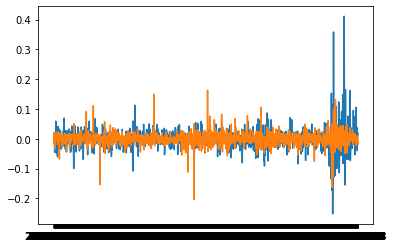

In [41]:
plt.plot(df2.index, df2["AAL alpha"])
plt.plot(df2.index, df2["AAP alpha"])

In [47]:
df2["AAL alpha"].max()

0.41131206002826115

In [48]:
# calculate alpha mean
(df2["AAL alpha"]).mean()

-3.5806168362003716e-05

In [44]:
df2["AAP alpha"].mean()

-1.0956458326217334e-05

In [45]:
df2["AAP"].mean()

0.00023497362828416325

In [46]:
df2["AAL"].mean()

-0.0003775054276768197

# 注意内容先搁置。
# We want to show the relation between alpha and return about AAL

In [37]:
df3 = df2.iloc[:, :2].copy()
df3.head()

,AAL,AAL alpha
2015-01-02,NaN,NaN
2015-01-05,-0.000557,-0.000457
2015-01-06,-0.015590,-0.015490
2015-01-07,-0.000566,-0.000466
2015-01-08,0.012262,0.012362


In [38]:
df3["Growth"] = df3["AAL"] > 0
df3["AAL alpha lag"] = df3["AAL alpha"].shift()
df3["AAL lag"] = df3["AAL"].shift()
df3.head(10)

,AAL,AAL alpha,Growth,AAL alpha lag,AAL lag
2015-01-02,NaN,NaN,False,NaN,NaN
2015-01-05,-0.000557,-0.000457,False,NaN,NaN
2015-01-06,-0.015590,-0.015490,False,-0.000457,-0.000557
2015-01-07,-0.000566,-0.000466,False,-0.015490,-0.015590
2015-01-08,0.012262,0.012362,True,-0.000466,-0.000566
2015-01-09,-0.030563,-0.030463,False,0.012362,0.012262
2015-01-12,-0.046905,-0.046805,False,-0.030463,-0.030563
2015-01-13,0.016539,0.016639,True,-0.046805,-0.046905
2015-01-14,-0.019643,-0.019543,False,0.016639,0.016539
2015-01-15,0.000000,0.000100,False,-0.019543,-0.019643


In [26]:
df4 = df3[df3['Growth']==True].copy()
df5 = df3[df3["Growth"]==False]

df4.head()

,AAL,AAL alpha,Growth,AAL alpha lag,AAL lag
2015-01-08,0.012262,0.013137,True,0.000310,-0.000566
2015-01-13,0.016539,0.017414,True,-0.046029,-0.046905
2015-01-16,0.008095,0.008971,True,0.000875,0.000000
2015-01-20,0.059024,0.059900,True,0.008971,0.008095
2015-01-21,0.017441,0.018316,True,0.059900,0.059024


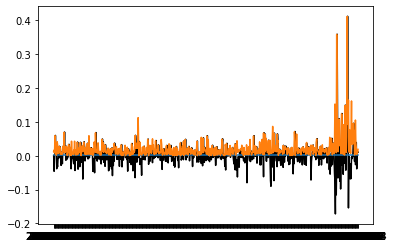

In [29]:
plt.plot(df4.index, df4["AAL alpha lag"], c="k")
plt.plot(df4.index, np.ones(len(df4.index))*df4["AAL alpha lag"].mean())
plt.plot(df4.index, df4["AAL"])

# Split df3 into trainning and testing data 


In [30]:
df3.head(10)

,AAL,AAL alpha,Growth,AAL alpha lag,AAL lag
2015-01-02,NaN,NaN,False,NaN,NaN
2015-01-05,-0.000557,0.000319,False,NaN,NaN
2015-01-06,-0.015590,-0.014715,False,0.000319,-0.000557
2015-01-07,-0.000566,0.000310,False,-0.014715,-0.015590
2015-01-08,0.012262,0.013137,True,0.000310,-0.000566
2015-01-09,-0.030563,-0.029687,False,0.013137,0.012262
2015-01-12,-0.046905,-0.046029,False,-0.029687,-0.030563
2015-01-13,0.016539,0.017414,True,-0.046029,-0.046905
2015-01-14,-0.019643,-0.018767,False,0.017414,0.016539
2015-01-15,0.000000,0.000875,False,-0.018767,-0.019643


In [31]:
import random
trainindex = random.sample(range(0, len(df3.index)), int(0.8*len(df3.index)))

In [33]:
len(trainindex)
trainindex.sort()

In [34]:
trainindex

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 20,
 21,
 22,
 23,
 24,
 26,
 27,
 28,
 30,
 31,
 33,
 34,
 36,
 37,
 38,
 39,
 41,
 42,
 44,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 56,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 79,
 81,
 82,
 83,
 84,
 85,
 86,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 97,
 99,
 100,
 103,
 104,
 105,
 106,
 108,
 109,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 140,
 141,
 145,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 165,
 166,
 167,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 186,
 187,
 188,
 189,
 190,
 192,
 194,
 196,
 197,
 198,
 199,
 201,
 202,
 203,
 205,
 206,
 207,
 208,
 210,
 213,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 22

In [61]:
df3.loc["2020-05-04":"2020-06-15"]

,AAL,AAL alpha,Growth,AAL alpha lag,AAL lag
2020-05-04,-0.077068,-0.076968,False,-0.113972,-0.114072
2020-05-05,-0.031568,-0.031468,False,-0.076968,-0.077068
2020-05-06,-0.027340,-0.027240,False,-0.031468,-0.031568
2020-05-07,0.031351,0.031451,True,-0.027240,-0.027340
2020-05-08,0.062893,0.062993,True,0.031451,0.031351
2020-05-11,-0.003945,-0.003845,False,0.062993,0.062893
2020-05-12,-0.044555,-0.044455,False,-0.003845,-0.003945
2020-05-13,-0.055959,-0.055859,False,-0.044455,-0.044555
2020-05-14,0.004391,0.004491,True,-0.055859,-0.055959
2020-05-15,-0.012022,-0.011922,False,0.004491,0.004391


In [68]:
df3[df3["AAL alpha lag"]>0.15]


,AAL,AAL alpha,Growth,AAL alpha lag,AAL lag
2020-03-11,-0.043529,-0.043430,False,0.152642,0.152542
2020-03-25,0.105603,0.105703,True,0.358149,0.358049
2020-06-05,0.111842,0.111942,True,0.411070,0.410970
2020-06-15,-0.002389,-0.002290,False,0.164217,0.164117
2020-07-16,-0.073661,-0.073561,False,0.161725,0.161625
